<h1 style="background:#e61010; border:0; border-radius: 16px; color:#D3D3D3"><center>1.Introduction</center></h1>

<div style="text-align: justify">Abalone is a shellfish considered a delicacy in many parts of the world. An excellent source of iron and pantothenic acid, and a nutritious food resource and farming in Australia, America and East Asia. 100 grams of abalone yields more than 20% recommended daily intake of these nutrients. The economic value of abalone is positively correlated with its age. Therefore, to detect the age of abalone accurately is important for both farmers and customers to determine its price. However, the current technology to decide the age is quite costly and inefficient. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a laborious task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. However, for this problem we shall assume that the abalone's physical measurements are sufficient to provide an accurate age prediction.</div>


**Paper objectives**:
1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

<a id ="2.1"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.1 Features of data</center></h2> 

- #### **The dataset has 4177 entries and 10 columns**:

Feature | Data Type | Measurement | Description 
:--------: | ------- | :-------: | -------  
`sex` | categorical |    | M, F, and I (Infant)
`length` | continuous | mm | longest shell measurement
`diameter` | continuous | mm | perpendicular to the length
`height` | continuous | mm | measured with meat in the shell
`whole_wt` | continuous | grams | whole abalone weight
`shucked_wt` | continuous | grams | the weight of abalone meat
`viscera_wt` | continuous | grams | gut-weight
`shell_wt` | continuous | grams | the weight of the dried shell
`rings` | continuous |  | number of rings in a shell cross-section
`age` | continuous |  | the age of the abalone: the number of rings + 1.5

In [109]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


<a id ="2.2"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.2 General information</center></h2> 

Now we can see all the general information of the dataset. First we will see the first 5 rows of the dataset. We will go through the typology, we will see that there are no duplicate data and that there are no missing values.

In [110]:
abalone = pd.read_csv('./abalone.csv')


In [111]:
abalone.head()


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [112]:
colnames = ['sex', 'length', 'diameter', 'height', 'whole_weight',
            'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
abalone.columns = colnames
abalone.head()


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
abalone['age']= abalone.rings*1.5
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,10.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,13.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,15.0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,10.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,12.0


In [ ]:
print('💠Shape of data:\n', '\t▶ Rows:',abalone.shape[0],
                        '\n \t▶ Columns:', abalone.shape[1])


💠Shape of data:
 	▶ Rows: 4176 
 	▶ Columns: 10


In [ ]:
print('💠 General information of data:\n')
abalone.info()


💠 General information of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4176 non-null   object 
 1   length          4176 non-null   float64
 2   diameter        4176 non-null   float64
 3   height          4176 non-null   float64
 4   whole_weight    4176 non-null   float64
 5   shucked_weight  4176 non-null   float64
 6   viscera_weight  4176 non-null   float64
 7   shell_weight    4176 non-null   float64
 8   rings           4176 non-null   int64  
 9   age             4176 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.4+ KB


missing values

In [ ]:
print('💠 Are there missing values?\n\n', abalone.isnull().any())


💠 Are there missing values?

 sex               False
length            False
diameter          False
height            False
whole_weight      False
shucked_weight    False
viscera_weight    False
shell_weight      False
rings             False
age               False
dtype: bool


finding duplicated values

In [ ]:
print('💠 Duplicate of data:', abalone.duplicated().any())


💠 Duplicate of data: False


<a id ="2.3"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.3 Data preprocessing</center></h2>

<a id ="2.3.1"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.3.1 Data typology and single visualization</center></h2>

<a id ="2.3.1.1"></a><h3 style="background:#e6df10; border:0; border-radius: 12px; color:black"><center>2.3.1.1 Categorical data</center></h3>

The only categorical feature is sex. It is divided into three subcategories: male, female and infant. As can be seen, the distributions between the three categories is homogeneous. The noteworthy fact is that the female subcategory has a lower mean than the other two.

In [ ]:
abalone.sex.value_counts()


M    1527
I    1342
F    1307
Name: sex, dtype: int64

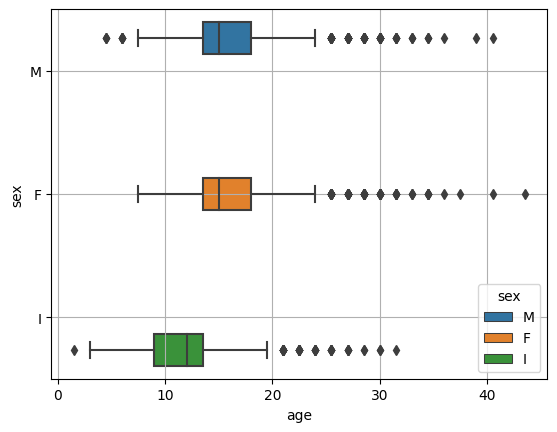

In [ ]:
sns.boxplot(data=abalone, x='age', y='sex', hue='sex');
plt.grid()

<a id ="2.3.1.2"></a><h3 style="background:#e6df10; border:0; border-radius: 12px; color:black"><center>2.3.1.2 Numerical data</center></h3>

There are nine continuous variables (including the target). All have similar scales except age and rings.

**💠-1- We will see the table with the statistical characteristics of each variable.** We have incorporated 3 new variables. We will also add colour for positive values (green) and negative values (red).

In [ ]:
from scipy import stats
from scipy.stats import iqr, skew, kurtosis, zscore

In [ ]:
abalone1 = abalone.select_dtypes(include=['float64', 'int64'])

In [ ]:
def colormap(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'lightblue'
    else:
        color = 'green'
    
    return f'color : {color}'

In [ ]:
stats = abalone.describe()
stats.loc['var'] = abalone1.var().tolist()
stats.loc['skew'] = abalone1.skew().tolist()
stats.loc['kurt'] = abalone1.kurtosis().tolist()
stats.style.applymap(colormap)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.359400,0.180613,0.238852,9.932471,14.898707
std,0.120103,0.099250,0.041826,0.490424,0.221980,0.109620,0.139213,3.223601,4.835402
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093375,0.130000,8.000000,12.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000,9.000000,13.500000
75%,0.615000,0.480000,0.165000,1.153250,0.502000,0.253000,0.329000,11.000000,16.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000
var,0.014425,0.009850,0.001749,0.240515,0.049275,0.012017,0.019380,10.391606,23.381114
skew,-0.640240,-0.609457,3.129241,0.530576,0.718724,0.591463,0.620547,1.115157,1.115157


In the table we can see that the features length and diameter have negative skew.

**💠-2- In the following we will look at the univariate distributions of all numerical variables.**

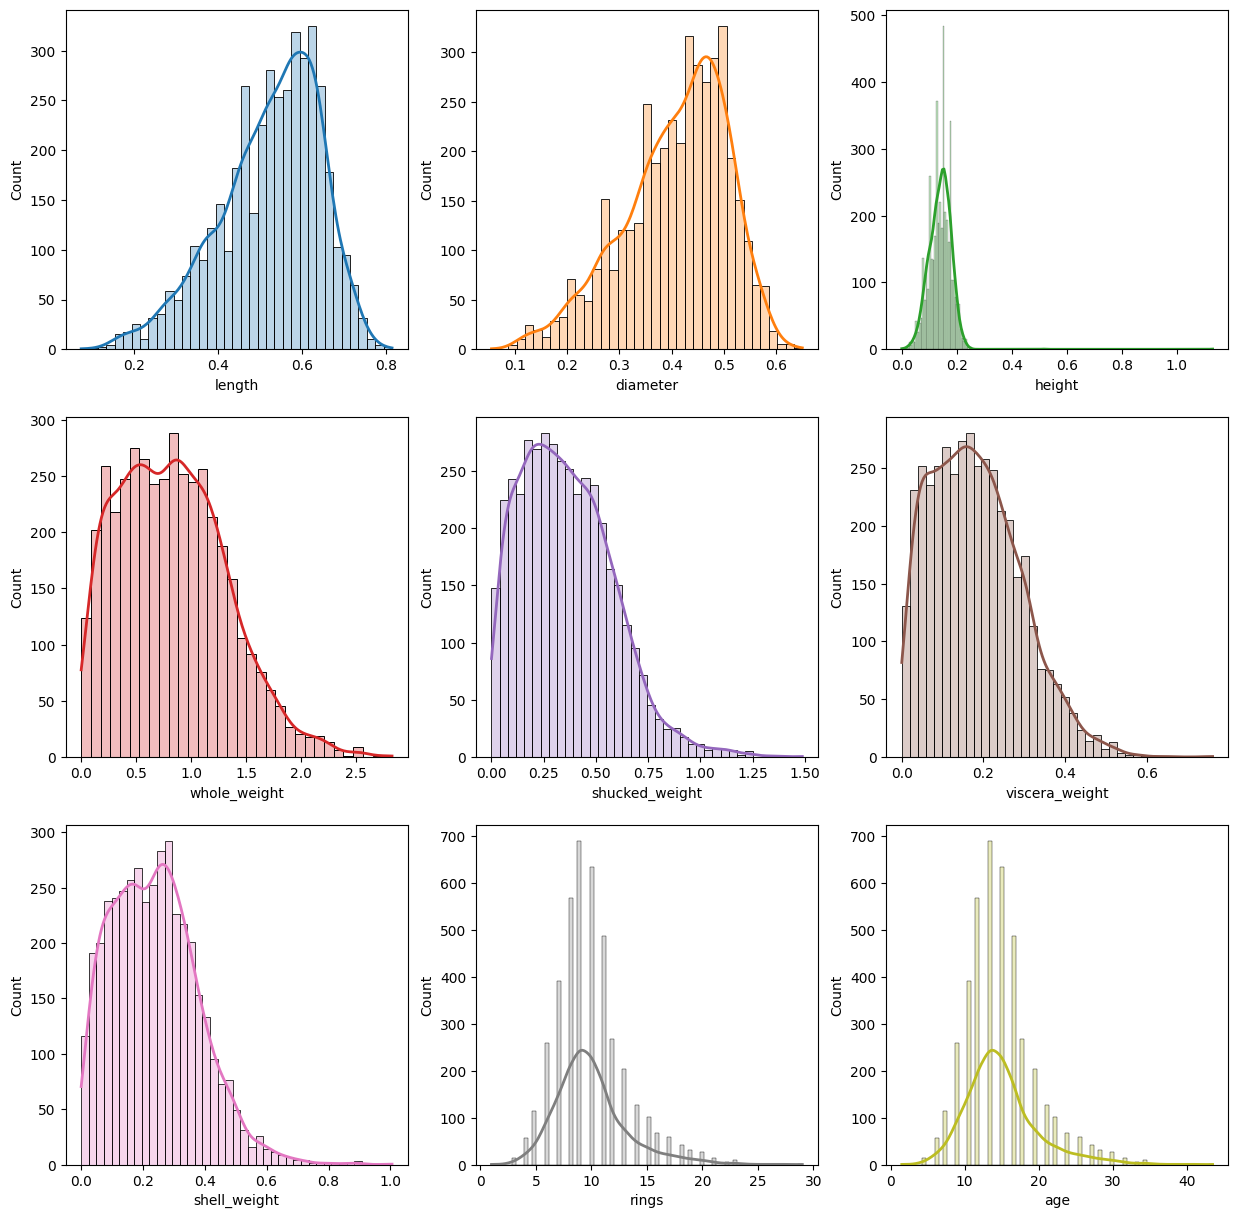

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes = axes.flat

for i, column in enumerate(abalone1):
    sns.histplot(
        data = abalone,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
)

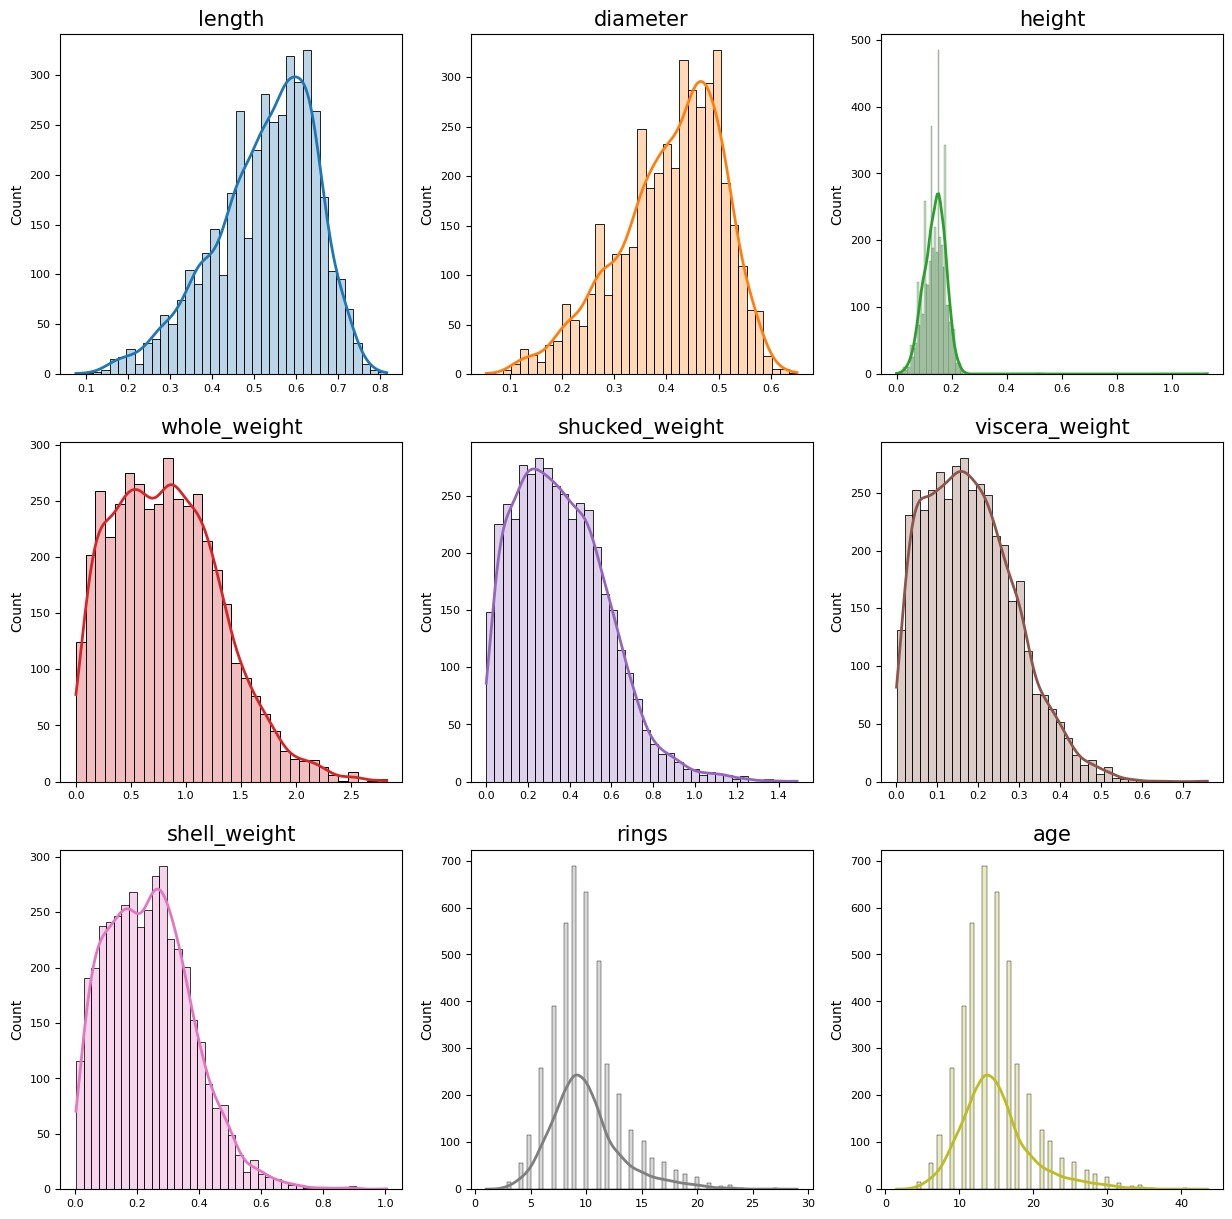

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes = axes.flat
for index, column in enumerate(abalone1):
    sns.histplot(
        data = abalone,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[index]
)
    axes[index].set_title(column, fontsize = 15)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')